#Analyzing when to go see Stephen Curry play

Analyzing when Stephen Curry scores the most points using statistically significance


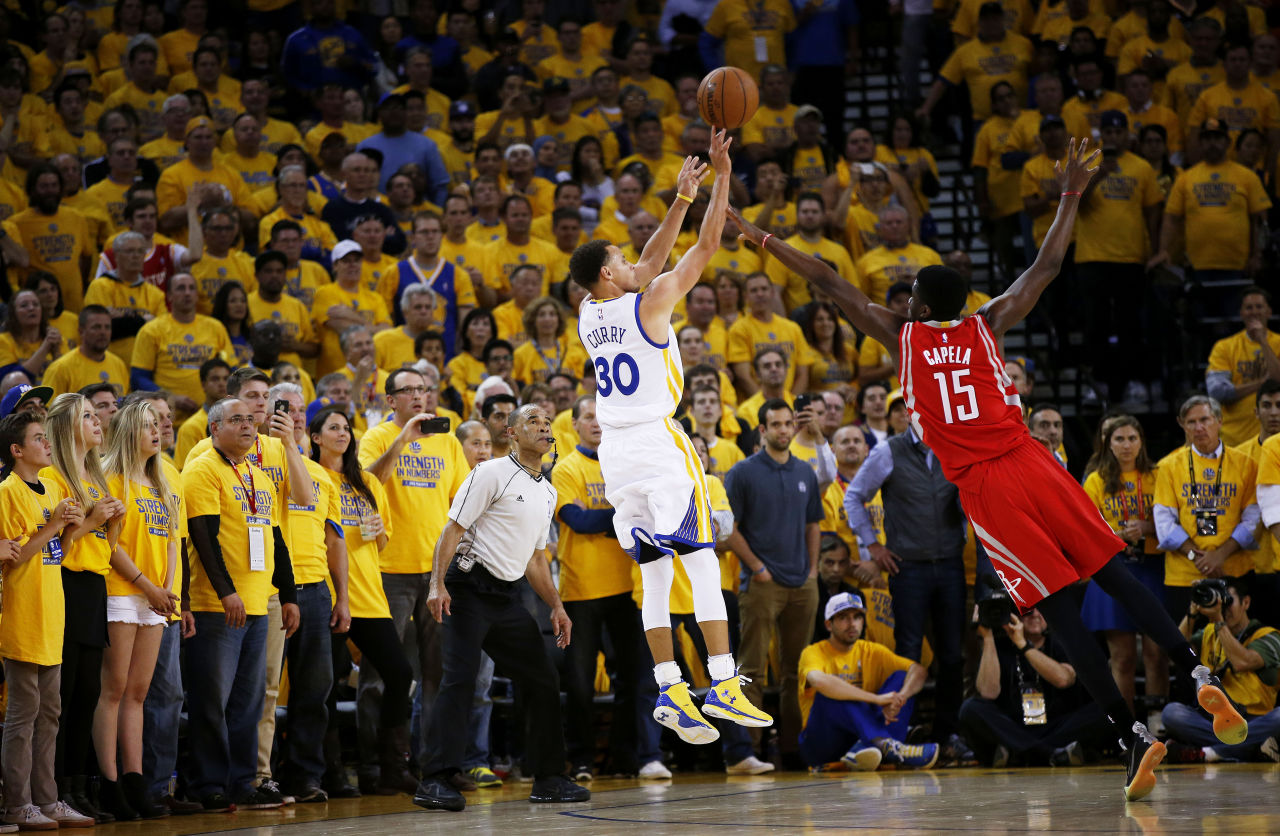

Stephen Curry is an American professioanl basketball player for the Golden State warriors. At 33 years old, he has played in the NBA for 12 seasons.

Throughout his time in the league he is a, 7 time NBA All-Star, 2 time Most Valuable Player, and a 3 time NBA champion.

He is also widly considered as **THE** greatest shooter of all time

As a big Steph Curry fan I want to buy a ticket when he is going to have a good game. 

Is that more likely to happen during the week or on the weekend?

# Getting Started 

#The Steps 



1.   Import the necessary libraries 
2.   Import and clean the dataset
3.   Divide data and perfom a statistical significan test 



Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [ ]:
from google.colab import  drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Downloadable Link to Dataset 

https://drive.google.com/file/d/1qfgsf8tIbyr6P9UJx7RzpT9cHmVtKvii/view?usp=sharing


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/2010-2021.csv')
df1 = pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/2010-2021.csv')

In [ ]:
#Cleaning Data 
#Changing Data Types

df['Date'] = df['Date'].astype('datetime64[ns]')
df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')
df['PTS'] = df['PTS'].fillna(0)
df['PTS'] = df.PTS.astype(int)

df['FT'] = pd.to_numeric(df['FT'], errors='coerce')
df['FT'] = df['FT'].fillna(0)
df['FT'] = df.FT.astype(int)

df['FTA'] = pd.to_numeric(df['FTA'], errors='coerce')
df['FTA'] = df['FTA'].fillna(0)
df['FTA'] = df.FTA.astype(int)

#creating dateframe for analysis
games = df[['Date','Day','FTA','PTS']]

# Weekend vs Weekday

**Question:** Should I purchase tickets to see Steph Curry for a weekend game or a game during the week. 

To analysis this I am using data from nbareference.com. 


I have compiled Stephen Curry's stats from every season in the NBA, exlcuding the 2020 season. (He was injured and did not play a majority of the games in the 2020 NBA seasosn)

In [ ]:
gamecount, rowcount = df.shape
print('Over 11 seasons people have had the opportunity to buy tickets to {} games to the Golden State Wariors when Steph Curry was on the team'.format(gamecount))

Over 11 seasons people have had the opportunity to buy tickets to 876 games to the Golden State Wariors when Steph Curry was on the team


I am including games he did not play because a fan would have still been able to buy a ticket to the game.

Total games played per weekday. 

Text(0.5, 0, '')

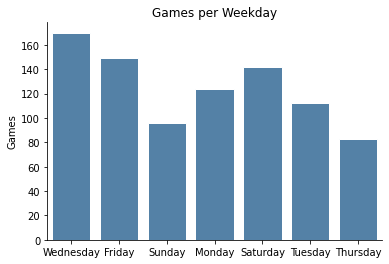

In [ ]:
plt.title('Games per Weekday')
sns.set_style('white')
sns.despine()
sns.countplot(x='Day',data=games, color='steelblue')
plt.ylabel('Games')
plt.xlabel('')

In [ ]:
weekday = games.groupby(games['Date'].dt.weekday)
daycount = weekday.count()
daycount['Day']

Date
0    124
1    112
2    170
3     83
4    149
5    142
6     96
Name: Day, dtype: int64

The most common day of the games were on Wednesday. 

In [ ]:
careeravg = games.PTS.mean()
print('Steph Curry career avg throughout 11 seasons is {} points'.format(careeravg))

Steph Curry career avg throughout 11 seasons is 20.924657534246574 points


Career Scoring Average is 21 points.

Average points Steph Currry scored per weekday 

Text(0.5, 0, '')

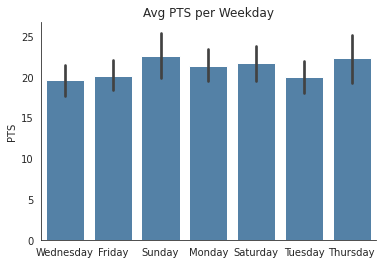

In [ ]:
plt.title('Avg PTS per Weekday')
sns.set_style('white')
sns.despine()
sns.barplot(x='Day',y='PTS',data=games,color='steelblue')
plt.ylabel('PTS')
plt.xlabel('')

Does Steph score more points during the week or on the weekend?

**Null Hypothesis:** There is no difference in the amount of points Steph scores during the week than on the weekend

**Alternative Hypothesis:** Steph Curry scores more points on the weekend

I am performing a t-test to determine if there is a difference in the average of points Steph score during the week and on weekends. 

In [ ]:
#Creating groups from games
duringweek = ['Sunday','Monday','Tuesday','Wednesday','Thursday']
weekends = ['Friday','Saturday']
weekday_df = games[games['Day'].isin(duringweek)]
weekend_df = games[games['Day'].isin(weekends)]
#Testing the statistical significance with a t-test
stats.ttest_ind(weekday_df['PTS'], weekend_df['PTS'])

Ttest_indResult(statistic=0.0464363168993928, pvalue=0.9629730989685792)

Result: A very large p-value

We accept the null hypothesis. There is not a statisically significant different in the average points Steph scores during the week and on the weekends 

Although there is not a significant difference between weekend and during the week games. 

Steph Curry has has 4 of his outlier games in points on the weekend. 

Text(0.5, 0, '')

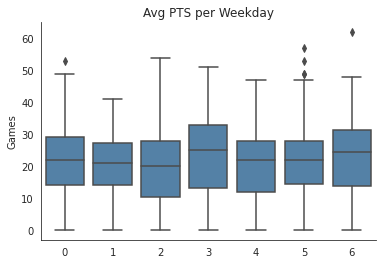

In [ ]:
plt.title('Avg PTS per Weekday')
sns.set_style('white')
sns.despine()
ax = sns.boxplot(x=games['Date'].dt.weekday,y='PTS', data=games, color='steelblue')
plt.ylabel('Games')
plt.xlabel('')

# Freethrows


During games, does Steph benifit from the game not slowing down with the shooting of freethrows?

First, a little data cleaning 

Removing all the games Steph Curry did not play.

In [ ]:
df1['FGA'] = pd.to_numeric(df1['FGA'], errors='coerce')
df1['Date'] = df1['Date'].astype('datetime64[ns]')
df1['PTS'] = pd.to_numeric(df1['PTS'], errors='coerce')
df1['FTA'] = pd.to_numeric(df1['FTA'], errors='coerce')
cleanedagain = df1[df1.FGA.notnull()]
freethrows_df = cleanedagain[['Date','Day','FTA','PTS']]

What speed of play does current benifit from?

The data I am using for this is Steph's stats from his 11 years playing in the NBA. 

I will perform a correlation test on the number of free throw attempts Steph took in a game to the number of points he scored in the game.

In [ ]:
freethrows_df.head()

,Date,Day,FTA,PTS
0,2009-10-28,Wednesday,0.0,14.0
1,2009-10-30,Friday,0.0,12.0
2,2009-11-04,Wednesday,0.0,7.0
3,2009-11-06,Friday,4.0,5.0
4,2009-11-08,Sunday,2.0,9.0


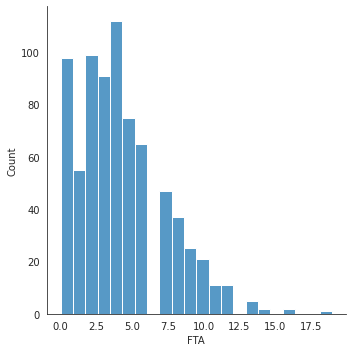

In [ ]:
sns.displot(freethrows_df,x='FTA')

In [ ]:
avgfreethrows = freethrows_df.FTA.mean()
print('Stephen average freethrows attempted per game is {}'.format(avgfreethrows))

Stephen average freethrows attempted per game is 4.221928665785997


Does Steph benifit from not taking alot of freethrows during a game. 

Meaning that when the basketball game is played fast and there is not alot of fouling Steph scores more points. 

**Null Hypothesis:** There is no correlation between the number of freethrows Steph Curry attempts and the amount of points he scores in a game.

**Alternative Hypothesis:** There is a negative/positive correlation between the number of freethrows Steph Curry attempts and the amount of points he scores in a game.

To analyze this I will look at the correlation of the amount of freethrows Steph takes and the amount of points he scored I will perform a Pearson Correlation test on the FTA and PTS from all of his games from his 11 seasons in the NBA. 

In [ ]:
# calculate Pearson's correlation
corr, _ = stats.pearsonr(freethrows_df['FTA'],freethrows_df['PTS'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.554


There is a somewhat positive correlation between the number of freethrows Steph attempts and the amount of points he scores in a game. 



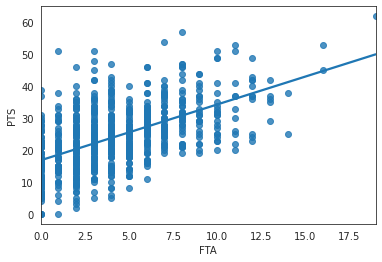

In [ ]:
sns.regplot(x='FTA',y='PTS',ci= None, data= freethrows_df)

In this case we would accept the alternative hypothesis. There is a correlation bewteen the amount of freethrows Steph attemps and the amonut of points he scores. 

A postive correlation means that Steph Curry does not benifit from the game not slowing down with fouls.

Steph curry does not perform better when the pace of the game is faster or slower. 